In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import yaml

In [16]:
import util
from importlib import reload
reload(util)
from util import chip_channel_to_index

# CONSTRUCT Geometry Information for Charge
pixel_x, pixel_y = util.construct_geometry()
peds = util.construct_pedestal('/data/v3/5x5/may_2025/packets-2025_05_30_13_55_PDT_46.h5')


In [23]:
%matplotlib ipympl

In [60]:
def plot_rate(f, ax, label=''):
    packets = f['packets']
    data = packets[packets['packet_type']==1]
    unique_chan = chip_channel_to_index(data['chip_id'].astype(int), data['channel_id'].astype(int))
    chans, counts = np.unique(unique_chan, return_counts=True)
    bins=np.logspace(-1, 6, 50)
    ax.hist(counts, bins=bins, label=label, alpha=0.3)
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    return counts, chans

In [80]:
file_pairs=[
('data//packet-2025_06_03_12_39_48_PDT.h5', 'data//initial-rate-check-packet-2025_06_03_12_32_18_PDT.h5'),
#('data//packet-2025_06_03_12_42_07_PDT.h5', 'data//rate_check-packet-2025_06_03_12_43_14_PDT.h5'),
('data//packet-2025_06_03_12_43_41_PDT.h5', 'data//rate_check-packet-2025_06_03_12_44_48_PDT.h5'),
#('data//packet-2025_06_03_12_45_15_PDT.h5', 'data//rate_check-packet-2025_06_03_12_46_22_PDT.h5'),
#('data//packet-2025_06_03_12_47_37_PDT.h5', 'data//rate_check-packet-2025_06_03_12_48_43_PDT.h5'),
('data//packet-2025_06_03_12_49_11_PDT.h5', 'data//rate_check-packet-2025_06_03_12_50_17_PDT.h5'),
#('data//packet-2025_06_03_12_50_45_PDT.h5', 'data//rate_check-packet-2025_06_03_12_51_52_PDT.h5'),
('data//packet-2025_06_03_13_47_10_PDT.h5', 'data//rate_check-packet-2025_06_03_13_48_17_PDT.h5'),
#('data//packet-2025_06_03_13_50_18_PDT.h5', 'data//rate_check-packet-2025_06_03_13_51_25_PDT.h5'),
    
# still using 5.0 ke- target threshold, use 0.3 ke- tolerance 
('data//packet-2025_06_03_13_52_43_PDT.h5', 'data//rate_check-packet-2025_06_03_13_53_49_PDT.h5'),
#('data//packet-2025_06_03_13_54_17_PDT.h5', 'data//rate_check-packet-2025_06_03_13_55_25_PDT.h5'),
('data//packet-2025_06_03_13_55_52_PDT.h5', 'data//rate_check-packet-2025_06_03_13_56_59_PDT.h5'),
('data//packet-2025_06_03_14_11_47_PDT.h5', 'data//packet-2025_06_03_14_11_47_PDT.h5')
]




Text(0, 0.5, 'channel density [arb.]')

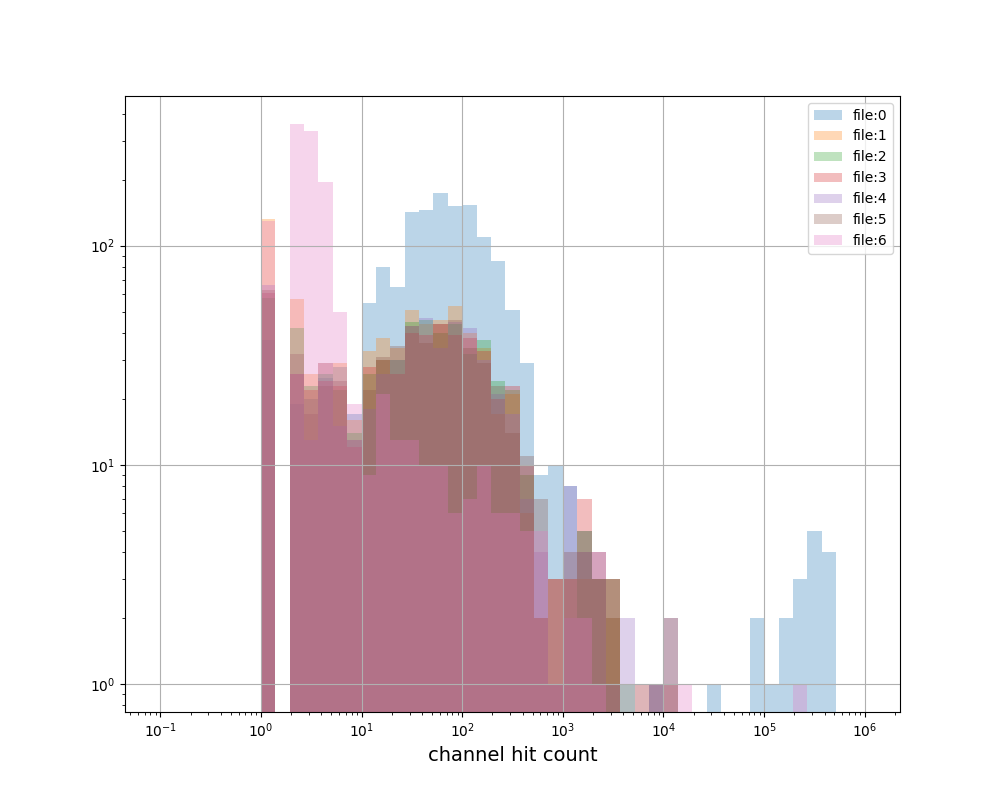

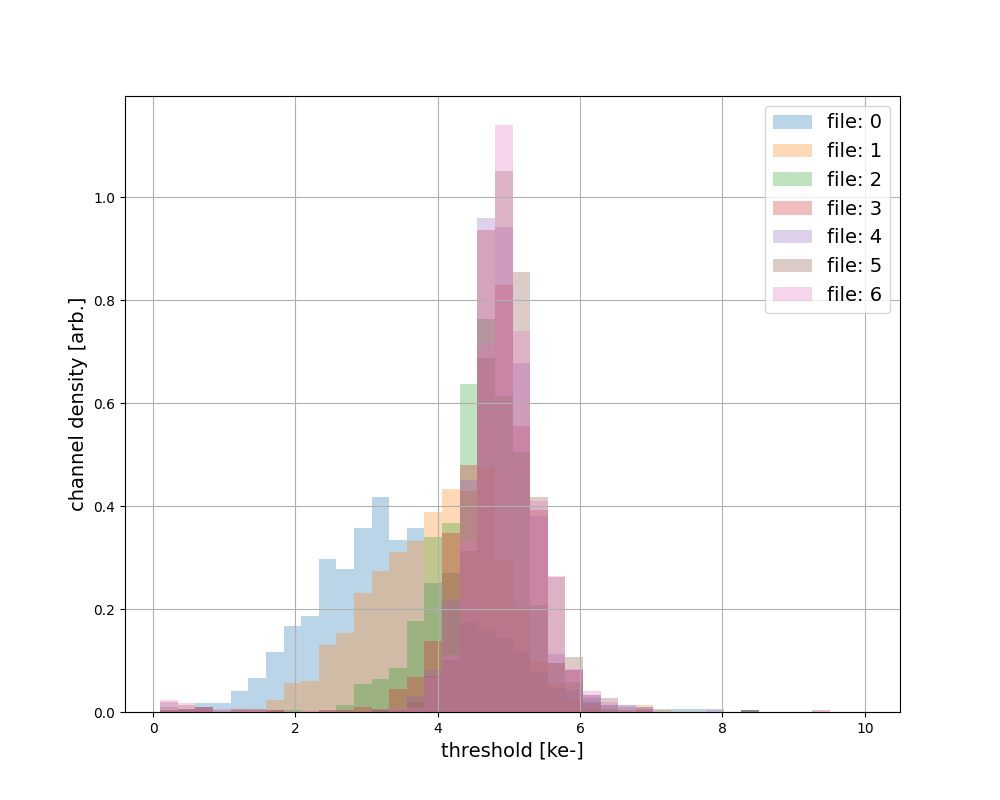

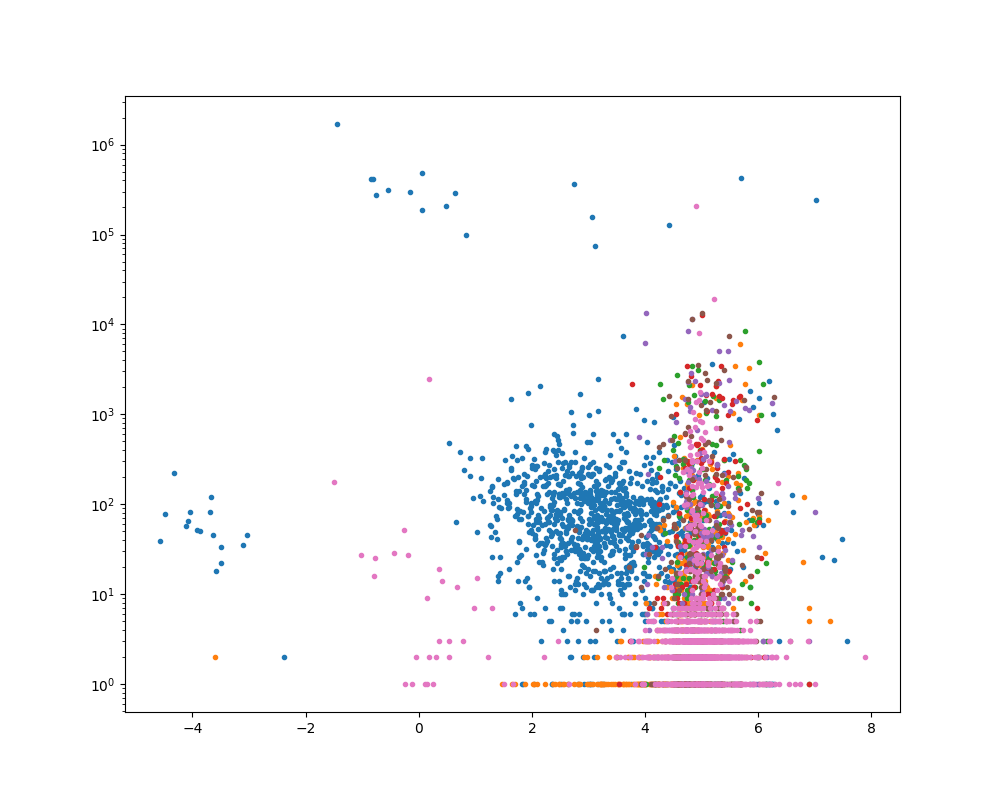

In [81]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot()

fig2=plt.figure(figsize=(10,8))
ax2=fig2.add_subplot()


fig3=plt.figure(figsize=(10,8))
ax3=fig3.add_subplot()

ped_file_name='/data/v3/5x5/may_2025/packets-2025_05_30_13_55_PDT_46.h5'

for ifile in range(len(file_pairs)):
    file = file_pairs[ifile][1]
    f=h5py.File(file)
    rates, indices = plot_rate(f, ax, label='file:'+str(ifile))
    file2 = file_pairs[ifile][0]
    
    thresholds = util.extract_thresholds(file2,ped_file_name)
    ax2.hist(thresholds, bins=40, label='file: '+str(ifile), range=(0.1, 10), alpha=0.3, density=True)
    
    ax3.scatter( thresholds[indices], rates, marker='.' )
    ax3.set_yscale('log')
    
    

ax.legend(fontsize=14)
ax.grid()
ax.set_xlabel('channel hit count', fontsize=14)
ax.legend()

ax2.legend(fontsize=14)
ax2.grid()
ax2.set_xlabel('threshold [ke-]', fontsize=14)
ax2.set_ylabel('channel density [arb.]', fontsize=14)

